<a href="https://colab.research.google.com/github/ferreiramar96/Projetos_AutoML/blob/main/Previs%C3%A3o_de_Custos_de_Seguro_de_Sa%C3%BAde_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão - Custos de Seguro de Saúde

Os custos de seguro de saúde são um elemento fundamental no sistema de saúde moderno, representando os pagamentos que os indivíduos, famílias ou empregadores fazem para obter cobertura médica. Esse componente é essencial para garantir o acesso a serviços médicos e proteção financeira em caso de doenças ou acidentes. Entender os custos associados ao seguro de saúde é crucial para tomar decisões informadas sobre cobertura e cuidados médicos.

Compreender os custos associados ao seguro de saúde é fundamental para escolher a cobertura certa para as necessidades individuais. Comparar diferentes planos, entender os termos e condições e calcular o impacto financeiro em diferentes cenários de atendimento médico são passos essenciais para garantir uma escolha informada.

<p align=center>
<img src="https://raw.githubusercontent.com/ferreiramar96/Projetos_AutoML/main/Previs%C3%A3o%20de%20Custos%20de%20Seguros%20da%20Sa%C3%BAde/Imagens/capa.jpg" width="85%"></p>

Encontrar um equilíbrio entre custos e cobertura é uma tarefa complexa. Planos com prêmios mais baixos podem ter deduções mais altas, o que pode resultar em despesas significativas caso ocorra uma necessidade de atendimento médico. Por outro lado, planos com prêmios mais altos podem oferecer uma cobertura mais abrangente e custos menores no momento do atendimento.

Investir em saúde preventiva pode ajudar a controlar os custos de seguro de saúde a longo prazo. Manter um estilo de vida saudável, realizar exames regulares e gerenciar condições de saúde podem reduzir a necessidade de tratamentos caros e hospitalizações, contribuindo para manter os custos sob controle.

O objetivo deste projeto é desenvolver um projeto de Regressão para prever o custo do Seguro de Vida.


## Sobre o Projeto

Como já sabemos, este projeto tem como finalidadae fazer a previsão de de custos do seguro de vida, ou seja um problema de regressão de machine learning. Porém não iremos montar fase a fase deste projeto de forma manual, iremos utilizar um framewokr de Auto Machine Learning que se chama *PyCaret*.

<p align=center>
<img src="https://raw.githubusercontent.com/ferreiramar96/Projetos_AutoML/main/Previs%C3%A3o%20de%20Custos%20de%20Seguros%20da%20Sa%C3%BAde/Imagens/logo.png" width="70%"></p>

PyCaret é uma biblioteca *open-source* e *low-code* de Python que tem como objetivo reduzir o templo entre o ciclo entre uma hipótese e insights em experimentos com Machine Learning.

O PyCaret é uma biblioteca em Python projetada para simplificar e acelerar o processo de desenvolvimento de modelos de aprendizado de máquina. Ela oferece uma interface simples e intuitiva que permite aos cientistas de dados e analistas explorar, pré-processar, treinar, ajustar hiperparâmetros e avaliar modelos de forma eficiente, eliminando boa parte da codificação manual tradicional.

## Aquisição dos Dados

Os dados foram disponibilizados no site do [Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction). Sabendo onde eles estão disponíves, podemos começar a parte de coleta e importação de nossos dados para o projeto, e a partir daí, trabalhar em cima deles.

Irei fazer a importação dos pacotes e visualizar as primeiros entradas de nosso dataframe, e em seguida irei montar o dicionário das variáveis.

In [83]:
#Instalando o PyCaret
!pip install pycaret -q

In [84]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pycaret.regression import setup, compare_models, models, create_model, predict_model
from pycaret.regression import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.regression import save_model, load_model
from sklearn.model_selection import train_test_split

#Definindo um Seed
np.random.seed(42)

In [85]:
#Importando os dados
dados = 'https://raw.githubusercontent.com/ferreiramar96/Projetos_AutoML/main/Previs%C3%A3o%20de%20Custos%20de%20Seguros%20da%20Sa%C3%BAde/previsao_custos_seguro_saude.csv'
df = pd.read_csv(dados)

#Visualizando as 5 primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Acima, vemos quais são nossas variáveis e como elas estão colocadas, agora iremos ver o que cada uma significa:
<br>
## Dicinário de Variáveis
* `age` - Idade do indivíduo
* `sex` - Gênero do indivíduo (masculino ou feminino)
* `bmi` -  Índice de Massa Corporal (IMC) do indivíduo, que é uma medida da proporção entre peso e altura
* `children` - Número de filhos/dependentes cobertos pelo seguro de saúde
* `smoker` - Indicação se o indivíduo é fumante (yes ou no)
* `region` - Região geográfica do indivíduo (northeast, southeast, southwest ou northwest)
* `charges` - Custo médico individual cobrado pelo seguro de saúde
<br><br>

Sabendo o que cada variável representa, podemos ver qual é o tamanho de nosso dataframe...e chegamos a conclusão que possuímos 1338 entradas e 7 variáveis.

In [86]:
#Comprimeto do DataFrame
print(f'Total de Linhas: {df.shape[0]}')
print(f'Total de Colunas: {df.shape[1]}')

Total de Linhas: 1338
Total de Colunas: 7


## Análise, Visualização e Transformação dos Dados

Esta será uma etapa crucial para nosso projeto, onde iremos entender o que os dados estão tentando transmitir através de: Visualização dos dados, Estatística, Verificar valores nulos, Distribuição dos dados e Correlação entre as variáveis. E além do mais, irei fazer algumas pequenas transformações em como os dados estão sendo classificados. *Mãos à Obra*:

In [87]:
#Consultando se os dados possuem valores ausentes
print(f'Porcentagem de valores ausentes: {(df.isnull().sum()/df.shape[0]).sum()}%')

Porcentagem de valores ausentes: 0.0%


Nosso conjunto de dados não possui nenhum valor ausente, então não precisamos nos preocupar e dessa forma podemos partir para a próxima etapa.

In [88]:
#Verificando os tipos de dados
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [89]:
#Fazendo uma descrição estatística dos dados
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observando a descrição estatística acima, podemos tirar algumas conclusões como:
* A média dos valores de Seguros é US$ 13.270.
* A menor idade é 18, o que faz sentido pois para fazer o seguro é preciso ter uma idade mínima.
* A média do BMI é 30.66 o que indica que a grande maioria, se encaixa no perfil de "Obeso".
* A quantidade máxima crianças é 5, onde 50% dos assinantes do seguro possuem apenas 1 filho.

<br>

A seguir *irei criar 3 gráficos para explicar alguns dos dados*, são eles: Histograma para ver a distribuição dos dados, BoxPlots para identificar valores outliers e Matriz de correlação para ver o grau de relação entre as variáveis.

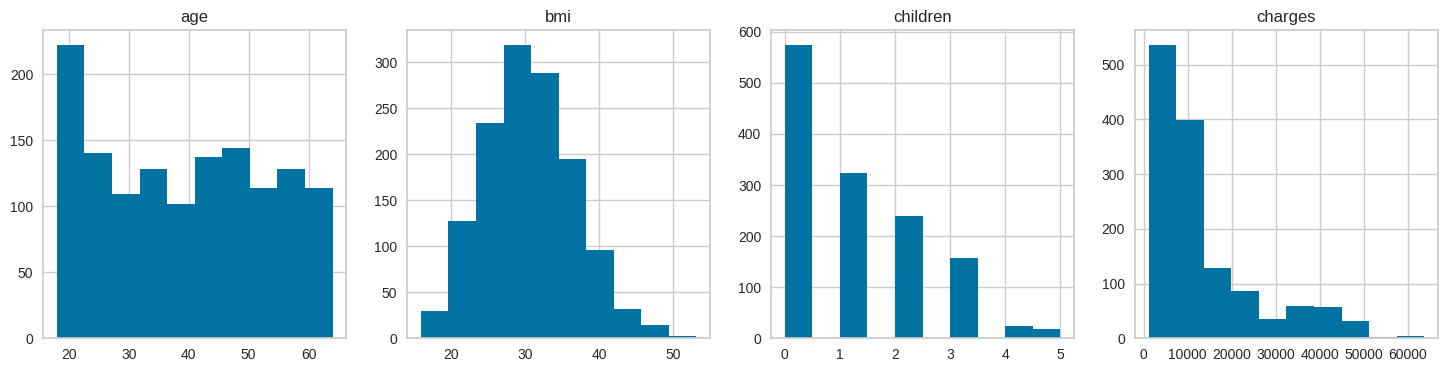

<Figure size 800x550 with 0 Axes>

In [90]:
#Plotando o Histograma
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(18, 4))

ax[0].hist(df['age'])
ax[0].set_title('age')

ax[1].hist(df['bmi'])
ax[1].set_title('bmi')

ax[2].hist(df['children'])
ax[2].set_title('children')

ax[3].hist(df['charges'])
ax[3].set_title('charges')

plt.show()
plt.tight_layout()

A partir do hitograma plotado acima, conseguimos observar que a variável `bmi` tem uma leve assimetria a esquerda, enquanto a variável `charges` possuí uma assimetria mais puxada à esquerda. Isso significa que em ambas as variáveis temos valores discrepantes, sendo em `charges` valores mais distorcidos. E para isso a seguir iremos plotar o BoxPlot dessas duas variáveis:

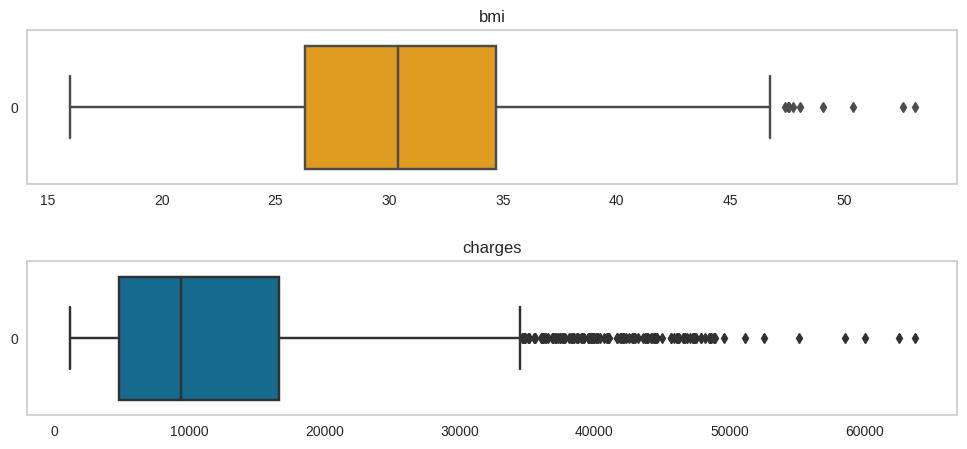

In [91]:
#Plotando o BoxPlot
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,5))

sns.boxplot(df['bmi'], ax=ax[0], orient='h', color='orange')
ax[0].set_title('bmi')
ax[0].grid(False)

sns.boxplot(df['charges'], ax=ax[1], orient='h')
ax[1].set_title('charges')
ax[1].grid(False)

plt.subplots_adjust(hspace=0.5)
plt.show()

Com os Boxlots feitos, conseguimos ver que SIM existem valores outliers. Normalmente eu trataria esses dados, porém como este é um projeto de AutoML...vou deixar tudo por conta dos modelos, e do pré-processamento que eles irão fazer. Dando continuidade vamos criar uma matriz de correlação, no entanto teremos de criar uma cópia do dataframe original para aplicarmos uma pequena transformação.

Essa transformação consiste em pegar a variável `smoker` e transforma-la para uma variável binária, para podermos ver utiliza-la na matriz de correlação. Pois *pensando em problema de negócio, com certeza se a pessoa é fumante...terá alguma correlação com o valor que ela paga*. Então vamos nessa:

In [92]:
#Fazendo a tranformação à mão mesmo
df_copy = df.copy()
df_copy['smoker'] = df_copy['smoker'].replace({'yes': 1, 'no': 0})

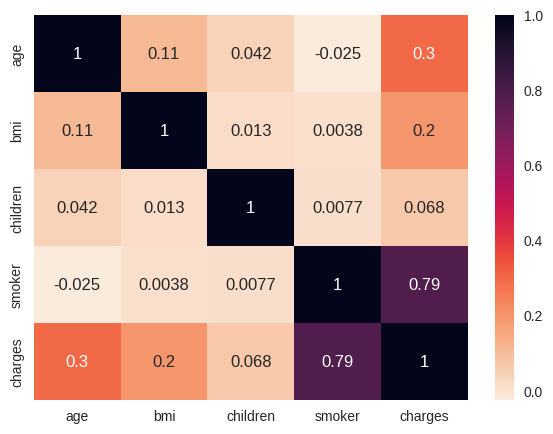

In [93]:
#Plotando a Matriz de Correlação
df_corr = df_copy.corr()

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df_corr, cmap='rocket_r', ax=ax, annot=True)
plt.show()

Agora, logo após termos aplicados essa pequena modificação na estrutura dos dados e termos montado nossa Matriz de Confusão podemos tirar algumas conclusões:

* As variáveis que possuem uma maior correlação são: `smoker` e `charges`. Ou seja, pequena transformação que eu fiz...mudou completamente a forma como nossa matriz se correlaciona, então foi um ponto chave para nossa análise.

* De resto nossas variáveis não possuem uma correlação muito relevante, no máximo a `age` e `bmi` que possuem uma relação de 30% e 20% com `charges`.

Nesta nossa última parte de análises, irei aplicar uma transformação na nossa coluna `bmi` e irei criar uma coluna de BMI categórica, que ficará mais facil de identificar qual é o tipo de BMI(IMC) da pessoa, e essa distribuição ficará da seguinte forma:

* Menor que 19 - Underweight (Abaixo do Peso)
* Entre 19 e 25 - Healthy (Peso Ideal)
* Entre 25 e  30 - Overweight (Sobrepeso)
* Acima de 30 - Obese (Obeso)

In [94]:
#Criando uma cópia
df_cat = df.copy()

#Definindo os intervalos
bins = [0, 18.5, 25, 30, 100]

#Definindo os labels
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

#Aplicando a transformação
df_cat['bmi_category'] = pd.cut(df_cat['bmi'], bins, labels=labels)

df_cat.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


Primeira parte de nosso projeto finalizado, agora vamos começar com a parte mais interessante, o AutoML.

## Auto Machine Learning

A Aprendizagem de Máquina Automatizada (AutoML) é uma abordagem inovadora que busca simplificar e acelerar o processo de desenvolvimento de modelos de aprendizado de máquina, reduzindo a necessidade de intervenção manual em várias etapas do fluxo de trabalho. O AutoML envolve o uso de algoritmos e técnicas automatizadas para realizar tarefas como seleção de modelos, ajuste de hiperparâmetros, pré-processamento de dados e avaliação de modelos.

<p align=center>
<img src="https://raw.githubusercontent.com/ferreiramar96/Projetos_AutoML/main/Previs%C3%A3o%20de%20Custos%20de%20Seguros%20da%20Sa%C3%BAde/Imagens/ml-automl-workflow.png" width="70%"></p>

A abordagem tradicional de construção de modelos de aprendizado de máquina envolve várias etapas complexas, como a seleção de algoritmos adequados, ajuste de hiperparâmetros, pré-processamento de dados, tratamento de valores ausentes e feature engineering. Cada uma dessas etapas exige conhecimentos especializados e experimentação iterativa para alcançar os melhores resultados.

O AutoML visa simplificar esse processo, permitindo que cientistas de dados, engenheiros e até mesmo pessoas sem conhecimento técnico profundo em aprendizado de máquina possam criar modelos eficazes de maneira mais eficiente.

Para começarmos nossa parte de Machine Learning, independentemente se é AutoML ou só ML...sempre teremos de separar nossos dados em treino e teste, então esse será nosso ponta pé inicial.

In [95]:
#Separando os dados em Treino e Teste
test = df.sample(frac=0.2)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

Acima separei nossos dados em treino e teste, sendo 80% dos dados originais para treino e os 20% restantes serão utilizados para teste.

### Criando um Pipeline

Através da função `setup` é possível criar nosso pipeline, dessa forma facilitando nosso trabalho e com este pipeline criado será possível até fazer um Deploy futuramente e caso seja preciso alterar algo, basta alterar dentro da função, por exemplo.

A função "setup" automatiza várias etapas de pré-processamento e configurações para permitir que você comece a treinar modelos com facilidade. Como por exemplo: Encoding, Normalização, Número de Folds e Log Experiment.

In [96]:
reg = setup(data=train,
            target='charges',
            normalize=True,
            encoding_method='one-hot')

,Description,Value
0,Session id,3742
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1070, 7)"
4,Transformed data shape,"(1070, 10)"
5,Transformed train set shape,"(749, 10)"
6,Transformed test set shape,"(321, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


Acima setei alguns parâmetros, passando os dados de treino, qual é nossa coluna target e além disso, passei 2 métodos de pre-processamento: Normalização e setei para fazer um encoding utilizando o método one-hot-encoder.

### Comparando Modelos

Essa função treina todos os modelos na biblioteca do PyCaret, no caso todos os modelos de Regressão, e os avalia usando validação cruzada que por padrão faz 10 iterações. Para a avaliação, a função imprime uma tabela que mostra a média do MAE, MSE, RMSE, R2, RMSLE e MAPE através dos folds de todos os modelos disponíveis na biblioteca.

* MAE - Mean Absolute Error (Média de Erro em Valores Absolutos).
* MSE - Mean Squared Error (Erro Quadrático Médio).
* RMSE - Root Mean Squared Error (Raiz do Erro Quadrático Médio).
* R2 - Coefficient of Determination R2 Score.
* RMSLE - Root Mean Squared Log Error.
* MAPE - Mean Absolute Percentage Error (Média do Erro Absoluto em Valores Percentuais).

Irei passar como parâmetro para a função, que desejo que ela ordene pelo maior valor de R2, iremos utilizar esta métrica como referêcia para este projeto.

In [97]:
reg.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2787.8179,24208665.3961,4795.1729,0.8432,0.4468,0.3162,0.1800
rf,Random Forest Regressor,2817.6698,24642891.7476,4864.9194,0.8387,0.4578,0.3217,0.8960
lightgbm,Light Gradient Boosting Machine,3070.7162,25977594.8211,5003.6335,0.8304,0.5460,0.3655,0.5400
et,Extra Trees Regressor,2844.1360,27976280.7933,5185.1263,0.8171,0.4751,0.3215,0.5760
ada,AdaBoost Regressor,4302.9646,29415995.5751,5385.0770,0.8043,0.6224,0.7047,0.1180
xgboost,Extreme Gradient Boosting,3151.9374,30335466.0000,5416.4989,0.7999,0.5410,0.3821,0.1740
knn,K Neighbors Regressor,3875.1283,37774886.6000,6040.9887,0.7529,0.4962,0.3862,0.2180
br,Bayesian Ridge,4425.1484,39708181.4609,6224.3261,0.7397,0.6334,0.4393,0.1800
llar,Lasso Least Angle Regression,4419.3640,39712215.6585,6224.6748,0.7397,0.6195,0.4383,0.2070
lar,Least Angle Regression,4419.5147,39712415.0565,6224.6908,0.7397,0.6179,0.4383,0.1740


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=3742)

Como podemos observar, de todos os modelos o que melhor se performou foi o *Gradient Boosting* com um R2 de 0.8478%, essa métrica é como se fosse a acurácia de nosso modelo. Logo a seguir irei explicar um pouco sobre como o algoritmo funciona e depois irei criar o modelo e armazena-lo em uma variável.

### Gradient Boosting Regressor

O processo do Gradient Boosting começa com a criação de um modelo inicial, geralmente uma árvore de decisão rasa ou uma regressão linear simples. Este primeiro modelo é treinado com os dados disponíveis e faz previsões iniciais. Em seguida, são calculados os resíduos, que são as diferenças entre as previsões do modelo inicial e os valores reais dos dados de treinamento. Esses resíduos representam o erro do modelo inicial.

A parte crucial do Gradient Boosting é a criação de um novo modelo que visa corrigir os erros do modelo anterior. Este novo modelo é treinado para prever os resíduos calculados na etapa anterior. A ideia é que, ao adicionar as previsões deste novo modelo às previsões do modelo inicial, os erros sejam reduzidos.

<p align=center>
<img src="https://raw.githubusercontent.com/ferreiramar96/Projetos_AutoML/main/Previs%C3%A3o%20de%20Custos%20de%20Seguros%20da%20Sa%C3%BAde/Imagens/model.png" width="75%"></p>

A cada iteração, um novo modelo é criado e treinado para prever os resíduos do modelo anterior. Os modelos individuais são adicionados ao conjunto, e suas previsões são combinadas ponderadamente. A ponderação depende de quão bem cada modelo se ajusta aos resíduos. O resultado é um modelo robusto e preciso que é capaz de fazer previsões muito melhores do que qualquer modelo individual.

Irei criar o modelo utilizando o código dele no PyCaret "gbr".

In [98]:
model_gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2671.1283,23751244.7731,4873.5249,0.8599,0.4590,0.3301
1,3724.9283,42350945.5736,6507.7604,0.7387,0.5211,0.3265
2,3225.6606,34180090.6593,5846.3741,0.7923,0.4967,0.2932
3,2897.3686,25157456.1167,5015.7209,0.8089,0.4925,0.3853
4,2121.3701,11639733.9797,3411.7054,0.9254,0.4132,0.3286
5,2587.8831,20144364.7021,4488.2474,0.8719,0.4053,0.3166
6,2693.9944,21936589.9622,4683.6513,0.8538,0.4668,0.2929
7,2252.3367,12092135.9308,3477.3749,0.9053,0.3683,0.2956
8,3577.1006,39559939.7855,6289.6693,0.7865,0.5105,0.3109


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning do Modelo

Com nosso modelo já em mãos, agora iremos partir para uma etapa fundamental de nosso projeto, que se trata da parte de tuning de um modelo de Machine Learning, que nada mais é do que ajustar os valores dos hiperparâmetros para se obter um melhor resultado.

E para não fazermos isso na mão o PyCaret oferece uma funcionalidade fácil de usar para o tuning de modelos, nos permitindo otimizar automaticamente os hiperparâmetros. E isso nos permite concentrar mais tempo na parte de análise e interpretação dos resultados do que na sintonia manual de hiperparâmetros.

A seguir irei passar como parâmetro da função para otimizar nosso modelo afim de obter um melhor valor para o R2.

In [99]:
tuned = tune_model(model_gbr, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2750.5482,22155244.8620,4706.9358,0.8693,0.4520,0.3584
1,3822.4835,42536810.7617,6522.0251,0.7376,0.5209,0.3776
2,3494.0062,33729848.1865,5807.7404,0.7950,0.5226,0.4094
3,3042.2193,24069070.5101,4906.0239,0.8172,0.5456,0.5114
4,2278.1003,11425878.0735,3380.2186,0.9267,0.4137,0.3613
5,2534.0351,18310596.3893,4279.0883,0.8836,0.4339,0.3685
6,3200.1748,25129434.3551,5012.9267,0.8325,0.4947,0.3808
7,2270.7603,10456067.2243,3233.5843,0.9181,0.3926,0.3413
8,3671.6679,39367059.0248,6274.3174,0.7876,0.4969,0.3586


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Podemos observar que após realizarmos o tuning do nosso modelo, não conseguimos obter um resultado melhor. Antes tinhamos um R2 de 0.84% e agora, após o tuning ele está 0.84%. Então por esse motivo, continuarei os próximos passos com o modelo que não foi tunado.

### Plotando Modelos

Agora para entendermos de uma forma melhor, irei criar alguns gráficos utilizando a própria biblioteca do PyCaret. Os seguintes gráficos serão plotados:
* Model Error
* Model Residuals
* Learning Curve
* Feature Importance

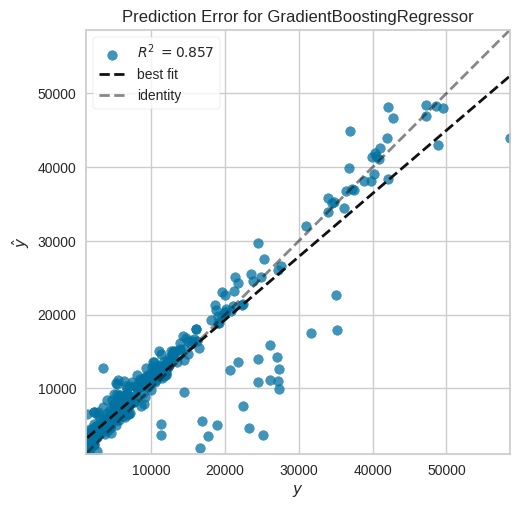

In [100]:
plot_model(model_gbr, plot='error')

Para entendermos esse gráfico, precisamos enter 2 conceitos:

* **best fit**: Significa que uma linha ou curva foi desenhada para representar a melhor adaptação aos dados, com base em algum critério específico.
* **identity**: Significa que uma linha ou curva simples foi plotada para representar uma relação linear direta entre duas variáveis. Em outras palavras, essa linha ou curva segue a identidade matemática, onde cada ponto no gráfico está alinhado com uma função linear simples, como y = x.

E podemos ver que a média de nossos dados que se ajustaram bem ao nosso modelo foi de 85%, um modelo muito bom.

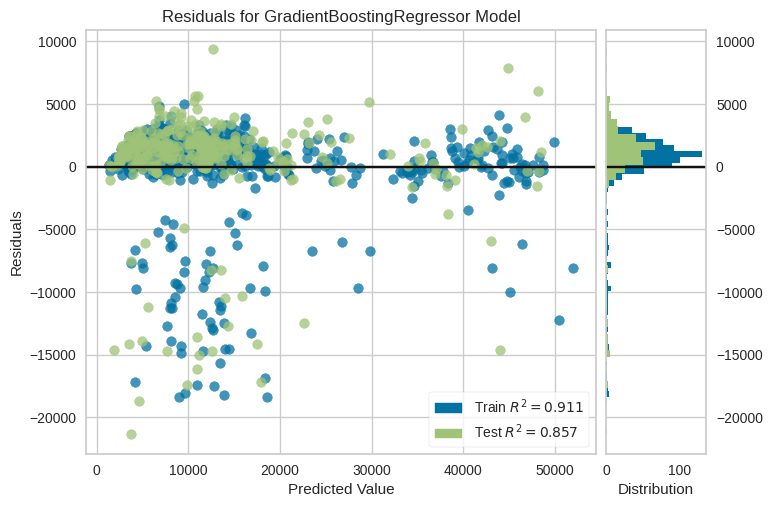

In [101]:
plot_model(model_gbr, plot='residuals')

Acima temos um gráfico de Resíduos, ele é bem parecido com o gráfico de Erro porém a sua diferença é que ele compara qual foi o desempenho do modelo com os dados de Treino e com os dados de Teste.

E observando podemos ver que com nossos dados de Treino o modelo obteve um resultado de 91%, já com os de dados Teste ele obteve 85%.

Lembrando que, nossos dados de Teste de fato ainda não foram utilizados. Esses dados de teste que ele aponta no gráfico, funciona da seguinte forma: Como o AutoML utiliza a validação cruzada, dentro dessa validação ele mesmo separa os dados em treino e teste. Ou seja, os dados de treino que fornecemos para o modelo, ele mesmo fez uma subdivisão entre treino e teste.

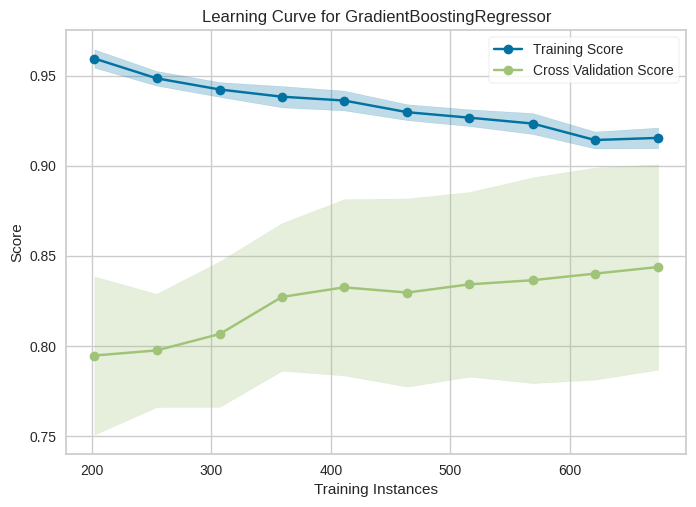

In [102]:
plot_model(model_gbr, plot='learning')

O gráfico de Curva de Aprendizado é uma ferramenta muito importante para avaliarmos o desempenho de um modelo de Machine Learning à medida em que se é treinado diferentes quantidades de dados, apresentando como foi a evolução de seu aprendizado.

O eixo X representa o tamanho do conjunto de dados de treinamento, equanto o eixo Y representa a métrica que foi escolhida, no nosso caso foi definido o R2. E as sombras de cada linha representa o desempenho do modelo ao longo do tamanho dos treinamentos, fazendo com que a linha seja a média do desempenho do modelo.

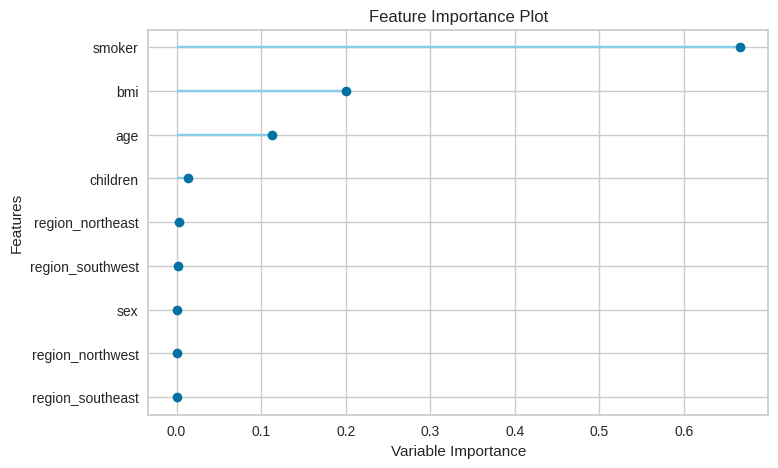

In [103]:
plot_model(model_gbr, plot='feature')

E para finalizar nossa parte de Plots, um gráfico apresentando quais são as *Features* mais importantes, as variáveis que mais tiverem peso, que mais serviram para influenciar nas decisões em nosso modelo.

* A primeira foi a variável `smoker` com um peso de quase 70%, isso pelo fato de se a pessoa for fumante ela tem uma maior tendência de precisar ativar o seu seguro de saúde.

* A segunda foi a `bmi` com um peso de quase 20%, pelo motivo de se a pessoa estiver obesa ou abaixo do peso, isso poderá resultar em uma saúde nada boa e consequentemente leva-los à precisar do seguro.

* A terceira foi a `age` com um peso de pouco mais que 10%, isso pois a idade com certeza poderá influênciar se o cliente possuí maior tendência a solicitar o seguro ou não.

De resto as variáveis não possuem peso tão significativo assim, então não vale nem a pena citar elas, mas podemos ver qual é o seu peso no modelo os observarmos o gráfico acima.

### Fazendo as Previsões

Após termos aplicado todas as transformações, tunagem e analise de nosso modelo, agora partimos finalmente para a parte de fazermos a predição e conseguirmos de fato um valor real para o desempenho de nosso modelo.

In [104]:
predict_model(model_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2521.6649,18043998.4672,4247.8228,0.8573,0.4456,0.3439


,age,sex,bmi,children,smoker,region,charges,prediction_label
959,31,female,21.754999,0,no,northwest,4134.082520,4418.635454
468,39,male,45.430000,2,no,southeast,6356.270508,7421.813686
210,58,female,25.200001,0,no,southwest,11837.160156,12710.744640
171,59,male,26.400000,0,no,southeast,11743.298828,13649.297015
793,38,male,28.270000,1,no,southeast,5484.467285,6650.493732
...,...,...,...,...,...,...,...,...
754,25,male,29.700001,3,yes,southwest,19933.457031,20347.205499
504,29,female,35.529999,0,no,southeast,3366.669678,5204.740781
42,18,female,35.625000,0,no,northeast,2211.130859,5099.952799
632,39,female,41.799999,0,no,southeast,5662.225098,7546.439668


Com nossa previsão feita, podemos ver que nosso resultado final foi um R2 de 85%

### Finalizando o Modelo

A função `finalize_model` é usada para finalizar o treinamento de um modelo selecionado após ter passado por todas as etapas de exploração, treinamento e ajuste de hiperparâmetros com as funções `setup`, `compare_models`, `create_model`, `tune_model`, entre outras. Ela nos permite concluir o treinamento do nosso modelo com base nas configurações e ajustes feitos durante a exploração do modelo.

In [105]:
final_model = finalize_model(model_gbr)
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=3742))])

Observando a saída acima, podemos ver qual foi o Pipeline de nosso modelo, para obtermos o nosso resultado final. E as etapas de pré-processamento foram:
* SimpleImputer: Completa os valores vazios
* One-Hot-Encoder: Faz a codificação de variáveis categóricas
* StandardScaler: Faz a padronização dos dados

Podemos adicionar um porém aqui, após finalizarmos nosso modelo, caso testarmos esse algoritmo com nosso conjunto de dados total é quase certeza que ocorrerá um Overfitting. Isso ocorrerá pelo fato de o modelo já ter visto os dados anteriormente, então caso nós queiramos prever novamente com este modelo, terá de ser aplicado apenas dados que nunca foram vistos.

Vamos testar com todo o nosso dataset:

In [106]:
predict_model(final_model, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2158.8249,15329041.9922,3915.2320,0.8954,0.3506,0.2525


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,19,female,27.900000,0,yes,southwest,16884.923828,18293.243250
1,18,male,33.770000,1,no,southeast,1725.552246,3030.474084
2,28,male,33.000000,3,no,southeast,4449.461914,6610.491147
3,33,male,22.705000,0,no,northwest,21984.470703,5985.380770
4,32,male,28.879999,0,no,northwest,3866.855225,4082.739787
...,...,...,...,...,...,...,...,...
1333,50,male,30.969999,3,no,northwest,10600.547852,11689.570863
1334,18,female,31.920000,0,no,northeast,2205.980713,3900.043986
1335,18,female,36.849998,0,no,southeast,1629.833496,2721.100214
1336,21,female,25.799999,0,no,southwest,2007.944946,2373.418774


Ao observarmos o resultado, vemos que ele teve um resultado acima de todas as etapas anteriores, mas não chegou a ser tão discrepante assim. Mas sim, foi pssível observar um aumento no resultado, e isso se dá pelo motivo de ter passado como dado, os dados novos e os dados que foram utilizados para o treinamento do modelo.

### Prevendo em Dados Novos

Chegou a parte de testarmos nosso modelo com os dados de teste, separados no início de nosso projeto, estes que nunca foram vistos pelo modelo. Então agora será a primeira vez que iremos ver como nosso modelo irá se desempenhar com dados novos.

In [107]:
new_predict = predict_model(final_model, data=test)
new_predict.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2405.9055,18749840.7773,4330.1086,0.8792,0.3934,0.2851


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,45,female,25.174999,2,no,northeast,9095.068359,10925.482144
1,36,female,30.020000,0,no,northwest,5272.175781,5706.412302
2,64,female,26.885000,0,yes,northwest,29330.982422,28037.933733
3,46,male,25.745001,3,no,northwest,9301.893555,9626.887547
4,19,male,31.920000,0,yes,northwest,33750.292969,33868.648842


Com a previsão feita, conseguimos observar que o resultado foi um resultado excelente comparado ao resultado dos dados de treinamento que obtemos 85% e com os novos dados obtemos 87%.

Com esse resultado, podemos dizer que nosso modelo está satisfazendo nossas necessidades e então podemos partir para o final de nosso projeto.

### Salvando o Modelo

Após todos os ajustes e análise dos resultados, temos a certeza de que este será o modelo que iremos utilizar para fazer nossas previsões, então iremos agora salvar este modelo e sempre poderemos utiliza-lo.

Utilizando a função `save_model` nós salvamos nosso algoritmo com todo o pipeline, pré-processamento e hyperparâmetros configurados anteriormente. E quem sabe até mesmo para salvarmos o arquivo para fazer o Deploy.

Obs: É sempre bom salvar o modelo com a data da última atualização, pois dessa forma fica mais fácil de identificar qual versão será utilizada.

In [108]:
save_model(final_model, 'Final_Model_15_09_2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': no     0
 yes    1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['region'],
    

Após executarmos a função, é exibido TODO o pipeline de nosso modelo.

### Carrregando um Modelo

E da mesma forma que nós podemos salvar o modelo em formato de um arquivo, também conseguimos importar esse arquivo para nosso projeto, e continuar a fazer novas previsões com este modelo que foi salvo anteriormente.

In [109]:
model_load = load_model('Final_Model_08_09_2023')

Transformation Pipeline and Model Successfully Loaded


Com nosso modelo carregado na célula acima, podemos fazer previsões em novos dados da mesma forma que utilizamos anteriormente. E para utilizarmos para fazer previsões em novos dados ficaria da seguinte forma:

*previsoes = predict_model(load_model, data=dados_novos)*

## Conclusão

Agora vamos para um ponto chave de nosso projeto, a conclusão:

* Comecei o projeto fazendo uma introdução ao que seria desenvolvido ao longo de todo o projeto, fiz uma pequena apresentação sobre como funciona um Seguro de Saúde e então parti para a parte de aquisição dos dados onde importei do meu GitHub e logo em seguida montei um dicionário de variáveis para explicar o que cada uma das colunas representava e qual sua importância.

* Depois fui para a parte de análise exploratória e visualização dos dados, onde fui capaz de verificar se existiam valores ausêntes em nosso dataset, montei um Boxplot para ver se existiam valores outliers e sim! Eles foram detectados, depois plotei um histograma para ver a distribuição dos dados das variáveis, onde não encontrei nada fora dos padrões. Fui capaz também de montar uma matriz de correlação e para finalizar essa primeira parte, criei uma coluna de classe para a variável "bmi" que nos permite interpretar mais facilmente.

* E então parti para o ponto chave deste projeto que é o AutoML. Comecei explicando como funciona todo o processo e qual é a sua finalidade, e então fui para a parte prática que começa onde setamos nosso ambiente e definimos qual será o pipeline utilizado em todo o processo, depois fiz uma comparação entre todos os modelos de Regressão disponíveis no PyCaret, e chegamos a conclusão de que o melhor modelo foi o *Gradient Boosting Regressor*.

* Com nosso modelo já definido, segui para os próximos passos da mesmo forma como um modelo de Machine Learning normal, a única diferença é que o AutoML é Low Code. Próximo passo foi fazer o tuning dos hyperparâmetros para ver se seria possível obter um melhor resultado, depois fui para a parte de plotar alguns gráficos para o melhor entendimento do desempenho do algoritmo, então plotei: Gráfico de Erro, Resíduos, Taxa de Aprendizado e Feature Importance.

* E como parte final do projeto, fiz a previsão e finalizei o modelo. E ai então finalmente teste o modelo em nossos dados de teste separados no início do projeto, e então salvei nosso modelo em formato de um arquivo para futuramente ele ser carregado e até mesmo ser feito um Deploy para ser capaz de prever em novos dados.